In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
%matplotlib inline
import seaborn as sns

### Data sets

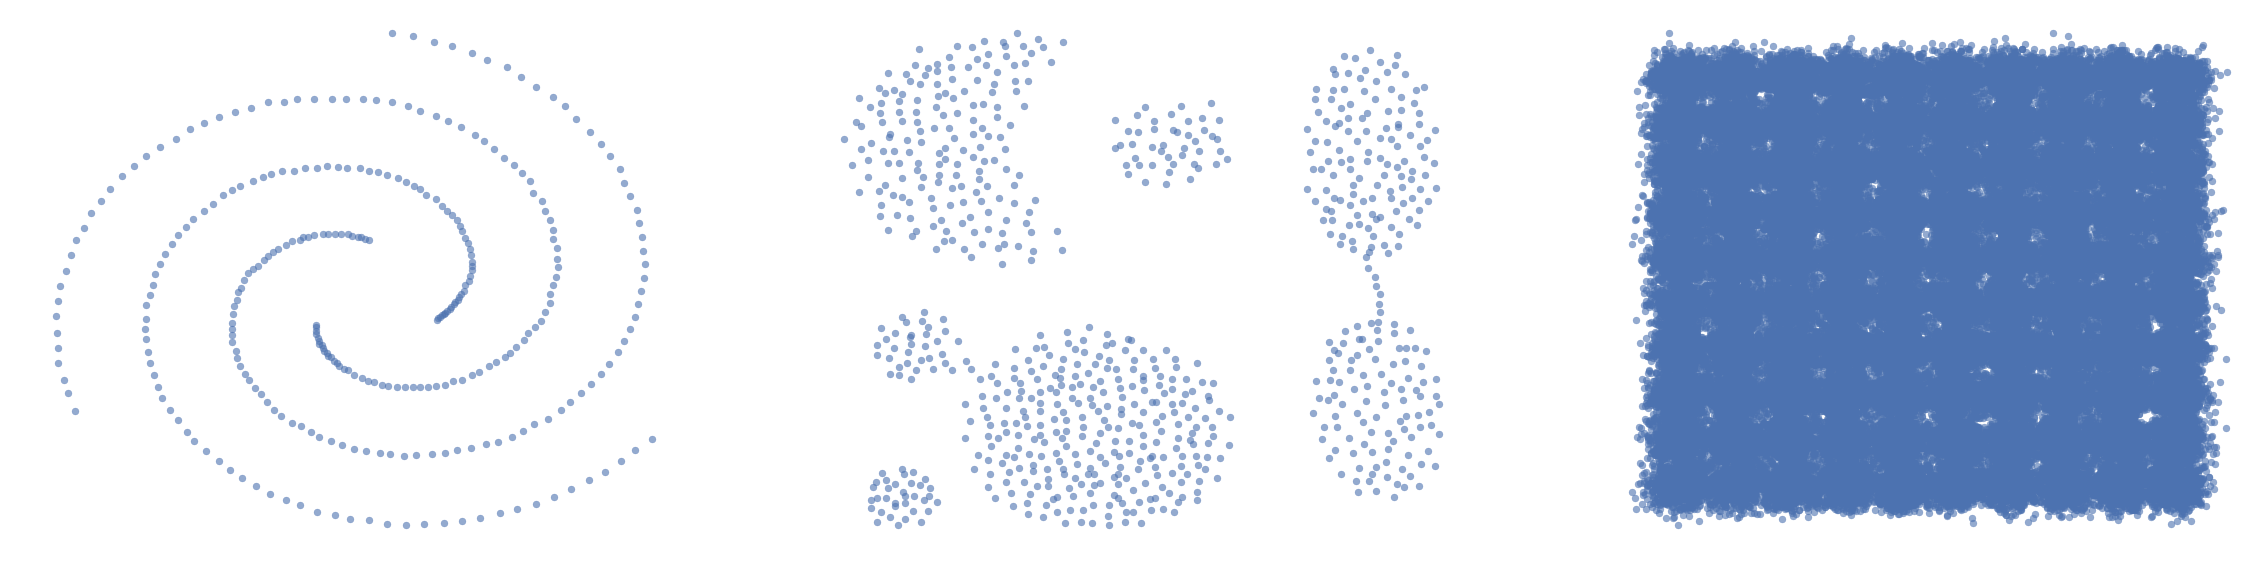

In [2]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

spiral=load_spiral_data(scale = 'True')
axarr[0].scatter(spiral[:,0],spiral[:,1],alpha=.6)
axarr[0].axis('off')

aggr=load_aggregation_data(scale = 'True')
axarr[1].scatter(aggr[:,0],aggr[:,1],alpha=.6)
axarr[1].axis('off')

birch1=load_birch1_data(scale = 'True')
axarr[2].scatter(birch1[:,0],birch1[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()

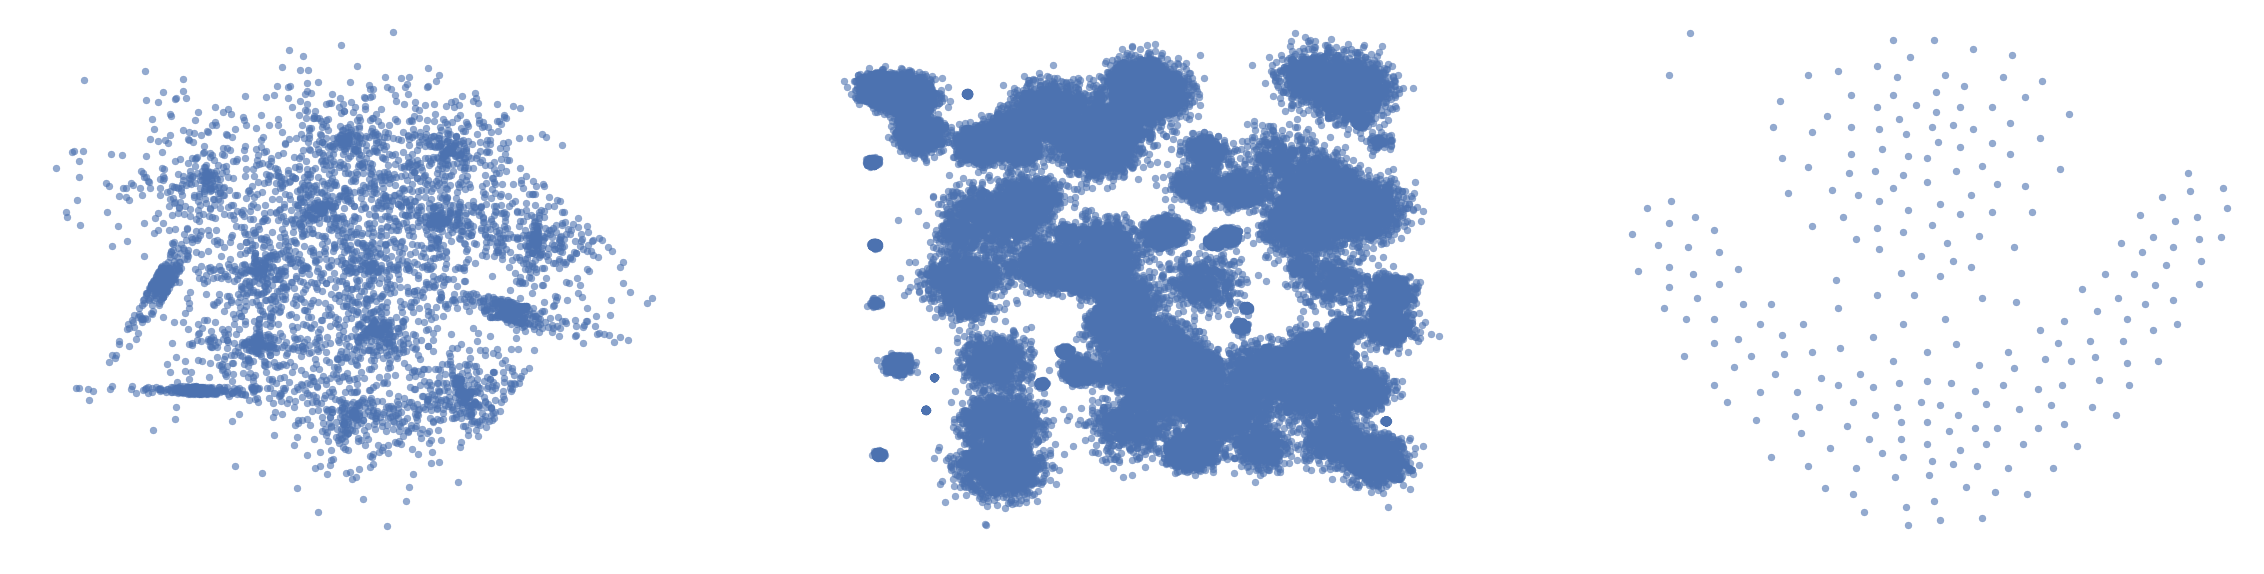

In [3]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

sets=load_sets_data(scale = 'True')
axarr[0].scatter(sets[:,0],sets[:,1],alpha=.6)
axarr[0].axis('off')

birch3=load_birch3_data(scale = 'True')
axarr[1].scatter(birch3[:,0],birch3[:,1],alpha=.6)
axarr[1].axis('off')

flame=load_flame_data(scale = 'True')
axarr[2].scatter(flame[:,0],flame[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()

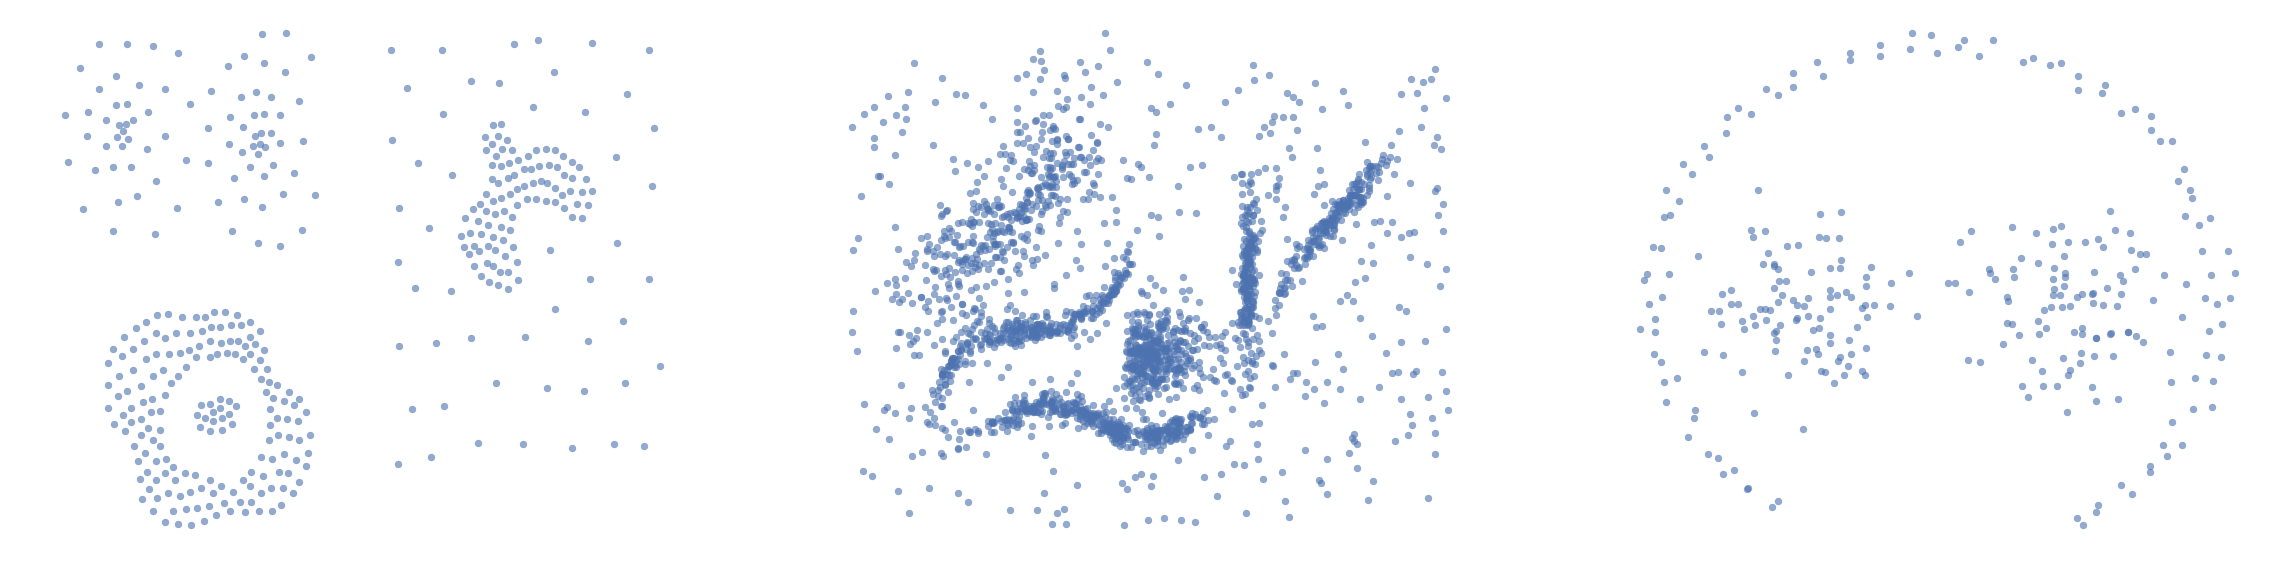

In [4]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

compound = load_compound_data(scale = 'True')
axarr[0].scatter(compound[:,0],compound[:,1],alpha=.6)
axarr[0].axis('off')

fuzzy = load_fuzzy_data(scale = 'True')
axarr[1].scatter(fuzzy[:,0],fuzzy[:,1],alpha=.6)
axarr[1].axis('off')

pathbased = load_pathbased_data(scale = 'True')
axarr[2].scatter(pathbased[:,0],pathbased[:,1],alpha=.6)
axarr[2].axis('off')

plt.show()